In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_excel('AirQualityUCI.xlsx')

In [13]:
# Handling missing values - Simple imputation (mean for numeric)
df = df.fillna(df.mean())

In [4]:
# Converting 'Time' column to datetime if it's present
if 'Time' in df.columns:
    df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

In [5]:
# Dropping non-numeric columns (including 'Time' if it's not converted to a usable numeric feature)
df = df.select_dtypes(include=[np.number])

In [6]:
# Defining features (X) and target (y)
X = df.drop(columns='T')  # Assuming 'T' is the target variable
y = df['T']

In [7]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Training a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Evaluating the Model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [10]:
# Printing evaluation metrics
print("Training Set Evaluation:")
print("Mean Squared Error (MSE):", mean_squared_error(y_train, y_pred_train))
print("R-squared (R2):", r2_score(y_train, y_pred_train))

Training Set Evaluation:
Mean Squared Error (MSE): 9.675240315689672
R-squared (R2): 0.994832251075004


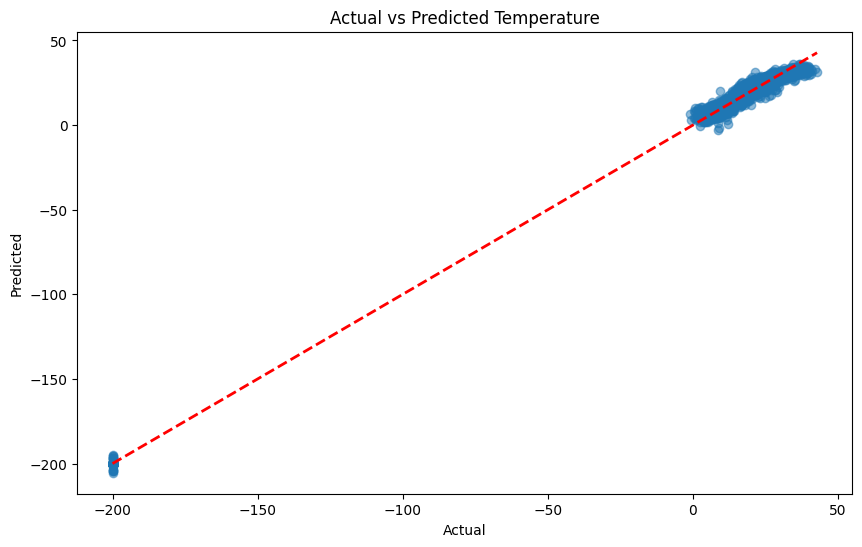

In [12]:
# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Temperature')
plt.show()